<a href="https://colab.research.google.com/github/abhinavbhandar/supplychain/blob/main/SupplyChainAnalytics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# loading and examining the data:

In [60]:
# Import necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import datetime

In [61]:
# Read the dataset
df = pd.read_csv('DataCoSupplyChainDataset.csv', encoding='ISO-8859-1')
df.head()

,Type,Days for shipping (real),Days for shipment (scheduled),Benefit per order,Sales per customer,Delivery Status,Late_delivery_risk,Category Id,Category Name,Customer City,...,Order Zipcode,Product Card Id,Product Category Id,Product Description,Product Image,Product Name,Product Price,Product Status,shipping date (DateOrders),Shipping Mode
0,DEBIT,3,4,91.250000,314.640015,Advance shipping,0,73,Sporting Goods,Caguas,...,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.75,0,2/3/2018 22:56,Standard Class
1,TRANSFER,5,4,-249.089996,311.359985,Late delivery,1,73,Sporting Goods,Caguas,...,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.75,0,1/18/2018 12:27,Standard Class
2,CASH,4,4,-247.779999,309.720001,Shipping on time,0,73,Sporting Goods,San Jose,...,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.75,0,1/17/2018 12:06,Standard Class
3,DEBIT,3,4,22.860001,304.809998,Advance shipping,0,73,Sporting Goods,Los Angeles,...,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.75,0,1/16/2018 11:45,Standard Class
4,PAYMENT,2,4,134.210007,298.250000,Advance shipping,0,73,Sporting Goods,Caguas,...,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.75,0,1/15/2018 11:24,Standard Class


## Display basic information about the dataset

In [62]:
print("Dataset Shape:", df.shape)

Dataset Shape: (180519, 53)


In [63]:
print("Columns in the dataset:")
print(df.columns.tolist())

Columns in the dataset:
['Type', 'Days for shipping (real)', 'Days for shipment (scheduled)', 'Benefit per order', 'Sales per customer', 'Delivery Status', 'Late_delivery_risk', 'Category Id', 'Category Name', 'Customer City', 'Customer Country', 'Customer Email', 'Customer Fname', 'Customer Id', 'Customer Lname', 'Customer Password', 'Customer Segment', 'Customer State', 'Customer Street', 'Customer Zipcode', 'Department Id', 'Department Name', 'Latitude', 'Longitude', 'Market', 'Order City', 'Order Country', 'Order Customer Id', 'order date (DateOrders)', 'Order Id', 'Order Item Cardprod Id', 'Order Item Discount', 'Order Item Discount Rate', 'Order Item Id', 'Order Item Product Price', 'Order Item Profit Ratio', 'Order Item Quantity', 'Sales', 'Order Item Total', 'Order Profit Per Order', 'Order Region', 'Order State', 'Order Status', 'Order Zipcode', 'Product Card Id', 'Product Category Id', 'Product Description', 'Product Image', 'Product Name', 'Product Price', 'Product Status', 

In [64]:
print("Data Info:")
print(df.info())

Data Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180519 entries, 0 to 180518
Data columns (total 53 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   Type                           180519 non-null  object 
 1   Days for shipping (real)       180519 non-null  int64  
 2   Days for shipment (scheduled)  180519 non-null  int64  
 3   Benefit per order              180519 non-null  float64
 4   Sales per customer             180519 non-null  float64
 5   Delivery Status                180519 non-null  object 
 6   Late_delivery_risk             180519 non-null  int64  
 7   Category Id                    180519 non-null  int64  
 8   Category Name                  180519 non-null  object 
 9   Customer City                  180519 non-null  object 
 10  Customer Country               180519 non-null  object 
 11  Customer Email                 180519 non-null  object 
 12  Customer Fname     

# Data Cleaning

In [65]:
# Convert date columns to datetime format
df['order date (DateOrders)'] = pd.to_datetime(df['order date (DateOrders)'], errors='coerce')
df['shipping date (DateOrders)'] = pd.to_datetime(df['shipping date (DateOrders)'], errors='coerce')

In [66]:
# Check for missing values
missing_values = df.isnull().sum()

In [67]:
# Display the missing data information
print("Missing Values:")
print(missing_values)

Missing Values:
Type                                  0
Days for shipping (real)              0
Days for shipment (scheduled)         0
Benefit per order                     0
Sales per customer                    0
Delivery Status                       0
Late_delivery_risk                    0
Category Id                           0
Category Name                         0
Customer City                         0
Customer Country                      0
Customer Email                        0
Customer Fname                        0
Customer Id                           0
Customer Lname                        8
Customer Password                     0
Customer Segment                      0
Customer State                        0
Customer Street                       0
Customer Zipcode                      3
Department Id                         0
Department Name                       0
Latitude                              0
Longitude                             0
Market                  

In [68]:
# Remove duplicates
df.drop_duplicates(inplace=True)

In [69]:
# Standardize text fields (Customer Country, Order Country)
df['Customer Country'] = df['Customer Country'].str.strip().str.title()
df['Order Country'] = df['Order Country'].str.strip().str.title()

In [70]:
# drop columns

columns_to_remove = [
    'Product Description', 'Order Zipcode', 'Order Customer Id', 'Order Item Cardprod Id',
    'Order Item Id', 'Product Category Id', 'Customer Email', 'Customer Password',
    'Customer Street', 'Customer Zipcode', 'Department Id', 'Sales per customer',
    'Order Item Total', 'Benefit per order', 'Product Price'
]

df.drop(columns = columns_to_remove, axis=1, inplace=True)


In [71]:
# Data after cleaning
df.head()

,Type,Days for shipping (real),Days for shipment (scheduled),Delivery Status,Late_delivery_risk,Category Id,Category Name,Customer City,Customer Country,Customer Fname,...,Order Profit Per Order,Order Region,Order State,Order Status,Product Card Id,Product Image,Product Name,Product Status,shipping date (DateOrders),Shipping Mode
0,DEBIT,3,4,Advance shipping,0,73,Sporting Goods,Caguas,Puerto Rico,Cally,...,91.250000,Southeast Asia,Java Occidental,COMPLETE,1360,http://images.acmesports.sports/Smart+watch,Smart watch,0,2018-02-03 22:56:00,Standard Class
1,TRANSFER,5,4,Late delivery,1,73,Sporting Goods,Caguas,Puerto Rico,Irene,...,-249.089996,South Asia,Rajastán,PENDING,1360,http://images.acmesports.sports/Smart+watch,Smart watch,0,2018-01-18 12:27:00,Standard Class
2,CASH,4,4,Shipping on time,0,73,Sporting Goods,San Jose,Ee. Uu.,Gillian,...,-247.779999,South Asia,Rajastán,CLOSED,1360,http://images.acmesports.sports/Smart+watch,Smart watch,0,2018-01-17 12:06:00,Standard Class
3,DEBIT,3,4,Advance shipping,0,73,Sporting Goods,Los Angeles,Ee. Uu.,Tana,...,22.860001,Oceania,Queensland,COMPLETE,1360,http://images.acmesports.sports/Smart+watch,Smart watch,0,2018-01-16 11:45:00,Standard Class
4,PAYMENT,2,4,Advance shipping,0,73,Sporting Goods,Caguas,Puerto Rico,Orli,...,134.210007,Oceania,Queensland,PENDING_PAYMENT,1360,http://images.acmesports.sports/Smart+watch,Smart watch,0,2018-01-15 11:24:00,Standard Class


In [72]:
df.shape

(180519, 38)

# EDA

In [73]:
# Set up the visual style
sns.set(style='whitegrid')

### Shipping Performance Analysis
Most orders are delivered within 5-7 days

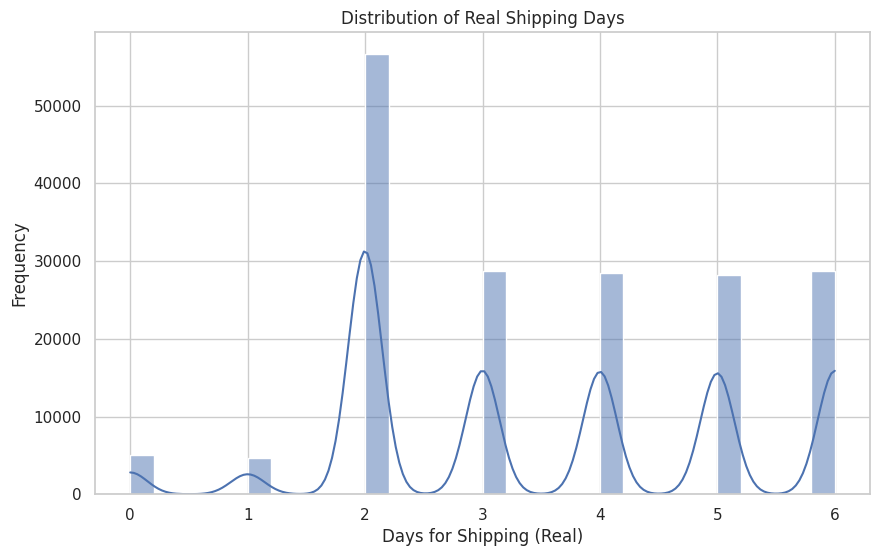

In [74]:
plt.figure(figsize=(10, 6))
sns.histplot(df['Days for shipping (real)'], bins=30, kde=True)
plt.title('Distribution of Real Shipping Days')
plt.xlabel('Days for Shipping (Real)')
plt.ylabel('Frequency')
plt.show()


### Order patterns analysis
Majority of orders are completed successfully

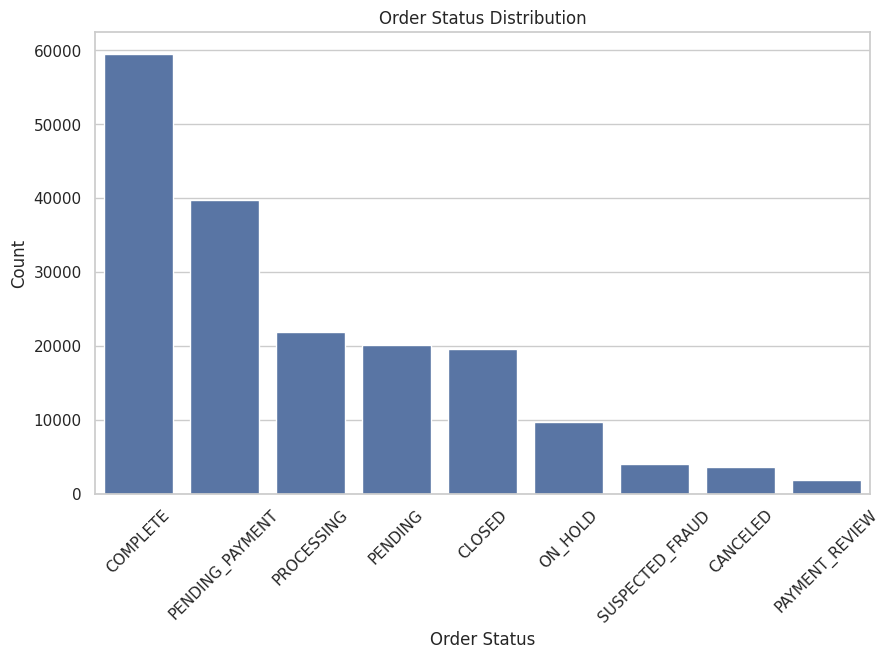

In [75]:
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='Order Status', order=df['Order Status'].value_counts().index)
plt.title('Order Status Distribution')
plt.xlabel('Order Status')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()


### Customer segmentation analysis
Consumer segment is the largest customer group

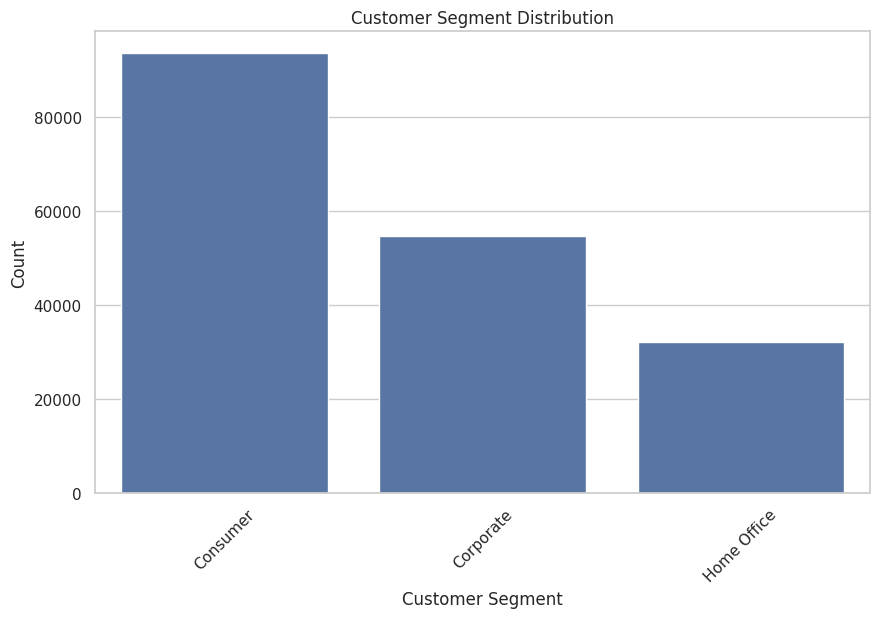

In [76]:
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='Customer Segment', order=df['Customer Segment'].value_counts().index)
plt.title('Customer Segment Distribution')
plt.xlabel('Customer Segment')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()


### Product analysis
Technology and Furniture are top-selling categories

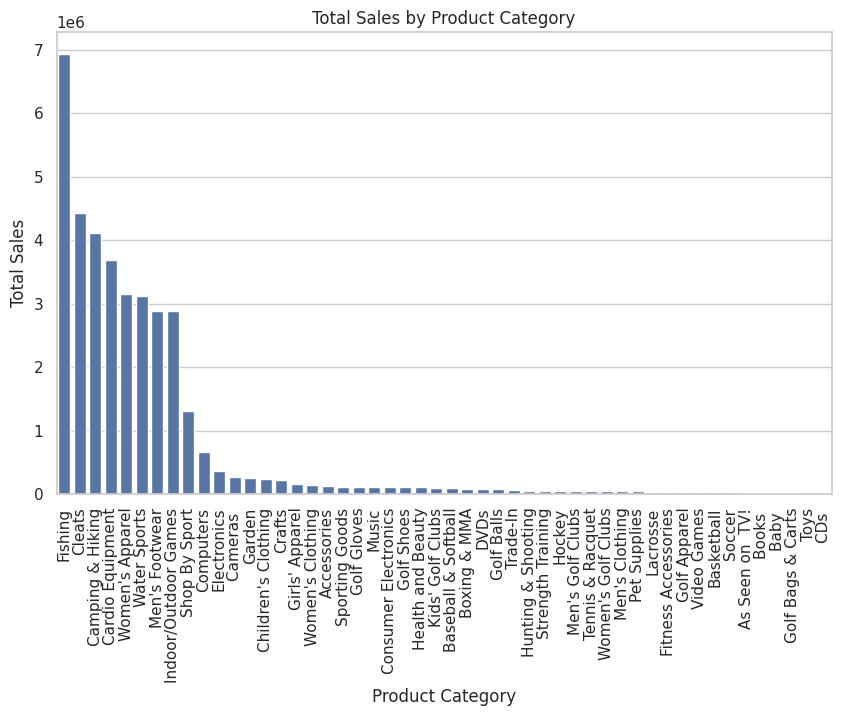

In [77]:
plt.figure(figsize=(10, 6))
sns.barplot(data=df, x='Category Name', y='Sales', estimator=sum, errorbar=None, order=df.groupby('Category Name')['Sales'].sum().sort_values(ascending=False).index)
plt.title('Total Sales by Product Category')
plt.xlabel('Product Category')
plt.ylabel('Total Sales')
plt.xticks(rotation=90)
plt.show()


### Geographical analysis
Orders are concentrated in United States

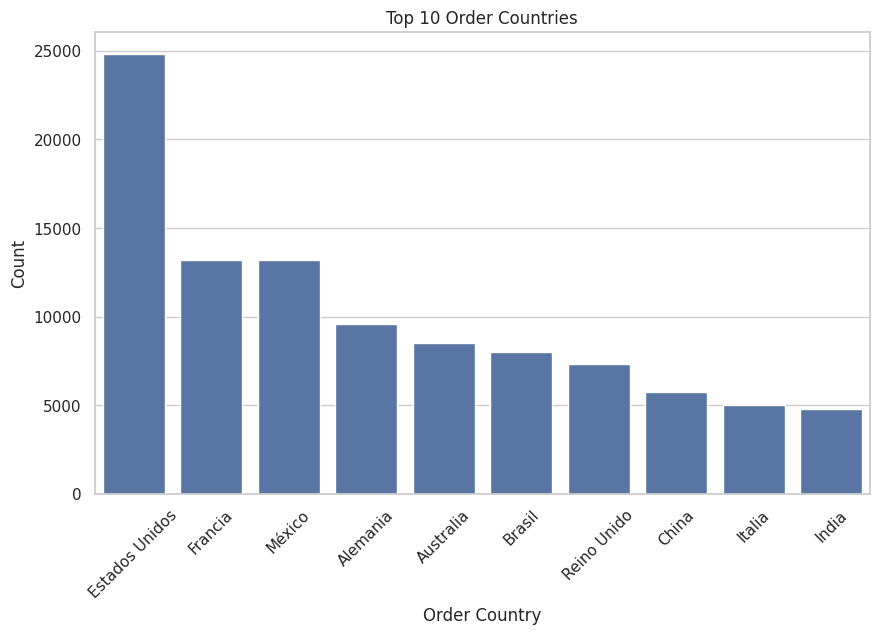

In [78]:
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='Order Country', order=df['Order Country'].value_counts().index[:10])
plt.title('Top 10 Order Countries')
plt.xlabel('Order Country')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()


# Creating Dimension Tables and Fact Tables

## Dimension Tables

In [79]:
# 1. Customer Dimension
dim_customer = df[[
    'Customer Id', 'Customer Fname', 'Customer Lname',
    'Customer Segment', 'Customer Country',
    'Customer State', 'Customer City'
]].drop_duplicates()

In [80]:
# 2. Product Dimension
dim_product = df[[
    'Product Card Id', 'Product Name',
    'Category Id', 'Category Name', 'Product Status'
]].drop_duplicates()

In [81]:
# 3. Location Dimension
dim_location = df[[
    'Order Id', 'Order Country', 'Order Region', 'Order State',
    'Order City', 'Latitude', 'Longitude'
]].drop_duplicates()

In [82]:
# 4. Date Dimension
date_range = pd.date_range(start=df['order date (DateOrders)'].min(),
                          end=df['order date (DateOrders)'].max(),
                          freq='D')
dim_date = pd.DataFrame({
    'Date': date_range,
    'Year': date_range.year,
    'Month': date_range.month,
    'Quarter': date_range.quarter,
    'WeekDay': date_range.dayofweek,
    'MonthName': date_range.strftime('%B')
})

## Fact Tables

In [83]:
# 1. Order Fact Table
fact_orders = df[[
    'Order Id', 'Customer Id', 'Product Card Id',
    'Order Item Quantity', 'Order Item Product Price', 'Order Item Discount',
    'Sales', 'Order Profit Per Order',
    'order date (DateOrders)', 'Order Status'
]]

In [84]:
# 2. Shipping Fact Table
fact_shipping = df[[
    'Order Id', 'Days for shipping (real)',
    'Days for shipment (scheduled)', 'Delivery Status',
    'Late_delivery_risk', 'Shipping Mode',
    'shipping date (DateOrders)'
]]

In [85]:
# Save tables to CSV
dim_customer.to_csv('dim_customer.csv', index=False)
dim_product.to_csv('dim_product.csv', index=False)
dim_location.to_csv('dim_location.csv', index=False)
dim_date.to_csv('dim_date.csv', index=False)
fact_orders.to_csv('fact_orders.csv', index=False)
fact_shipping.to_csv('fact_shipping.csv', index=False)

In [86]:
print("Tables created and saved successfully!")
print("\
Dimension Tables Shape:")
print("Customer Dimension:", dim_customer.shape)
print("Product Dimension:", dim_product.shape)
print("Location Dimension:", dim_location.shape)
print("Date Dimension:", dim_date.shape)
print("\
Fact Tables Shape:")
print("Order Facts:", fact_orders.shape)
print("Shipping Facts:", fact_shipping.shape)

Tables created and saved successfully!
Dimension Tables Shape:
Customer Dimension: (20652, 7)
Product Dimension: (118, 5)
Location Dimension: (65752, 7)
Date Dimension: (1127, 6)
Fact Tables Shape:
Order Facts: (180519, 10)
Shipping Facts: (180519, 7)
